In [1]:
#import libraries

import pandas as pd
import numpy as np 
import plotly.express as px
import missingno as msno
import matplotlib.pyplot as plt
import plotly.graph_objects as go
#%matplotlib inline
#%matplotlib nbagg
#%matplotlib widget
#%matplotlib tk


## The objective of this notebook is to show some graphs that can be made by means of plotly using a dataset of netflix movies. Trying to find what is the type of movie that is most repeated in the dataset.

![hola](https://c.tenor.com/zQ6H2k7HwGcAAAAC/netflix-netflix-logo.gif)

### Netflix, Inc. is an American streaming platform and entertainment company. Located in Los Gatos (California), the company was created in 1997 and a year later it began its activity, offering a DVD rental service through the mail.3 Currently, Netflix participates in the production of audiovisual works, from the creation or acquisition of the product until its worldwide distribution.

### For more information about the company consult the following link on wikipedia [netflix](https://es.wikipedia.org/wiki/Netflix)


In [2]:
#read the df and extract the movies from the type column and create a new df
df=pd.read_csv("C:/Users/rafae/OneDrive/Escritorio/Badededatosexcel/netflix_titles.csv")
movies=pd.DataFrame(df[df["type"]=="Movie"])

In [3]:
#Show the first 3 rows of the new df
movies.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


# Missing values

In [4]:
# Show columns with missing values
movies[movies.columns[movies.isnull().any()]].isnull().sum()

director    188
cast        475
country     440
rating        2
duration      3
dtype: int64

# Replace values

In [5]:
#replace the missing values in the case of director and cast, since they are not so important, leave them as "noavailable" in the case of country
#since it was netflix from the United States, I thought that most of the movies would be from that place, rating and duration, I replaced it with mode
movies["director"]=movies["director"].fillna("NoAvailable")
movies["cast"]=movies["cast"].fillna("NoAvailable")
movies["country"]=movies["country"].fillna("United States")
movies["rating"]=movies["rating"].fillna(movies["rating"].mode())
movies["duration"]=movies["duration"].fillna(movies["duration"].mode())

In [6]:
#Create new column from date_added with month, month name and year occupying dt
movies["date_added"]=pd.to_datetime(movies["date_added"])
movies["month_added"]=movies["date_added"].dt.month
movies['month_name_added']=movies['date_added'].dt.month_name()
movies['year_added'] = movies['date_added'].dt.year

In [7]:
# split the duration column into duration and min
movies[["duration_min","min"]]=(movies["duration"].str.split(" " , expand=True))

In [8]:
movies["duration_min"]=movies["duration_min"].fillna(movies["rating"].mode())

In [9]:
#these columns have list values in some rows so what I do is create a new df to analyze each value in detail
movies_listed_in = movies.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movies_cast = movies.set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movies_director = movies.set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
movies_country = movies.set_index('title').country.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# column analysis

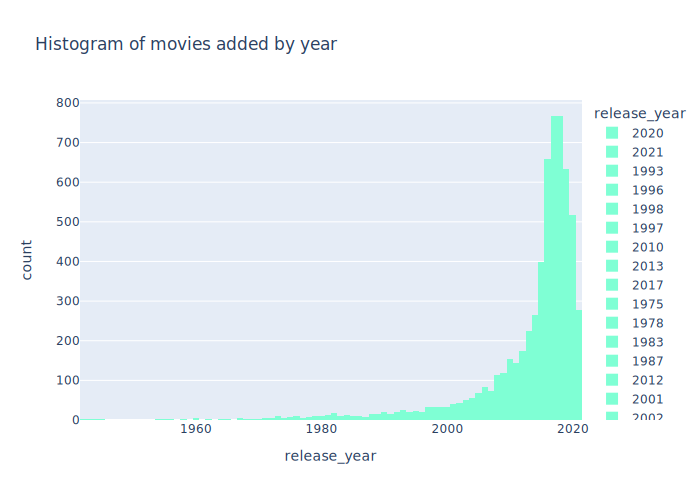

In [10]:
df=movies
fig = px.histogram(df, x="release_year",color="release_year",color_discrete_sequence=["aquamarine"],title="Histogram of movies added by year")
fig.show("svg")

## Most of the movies were made after 2016, this means that netflix usually buys recent movies and almost doesn't buy movies from before 2010. This seems to be because netflix made its leap to fame around 2010 and from then on. growing more in popularity, which made him buy the movies of recent years.

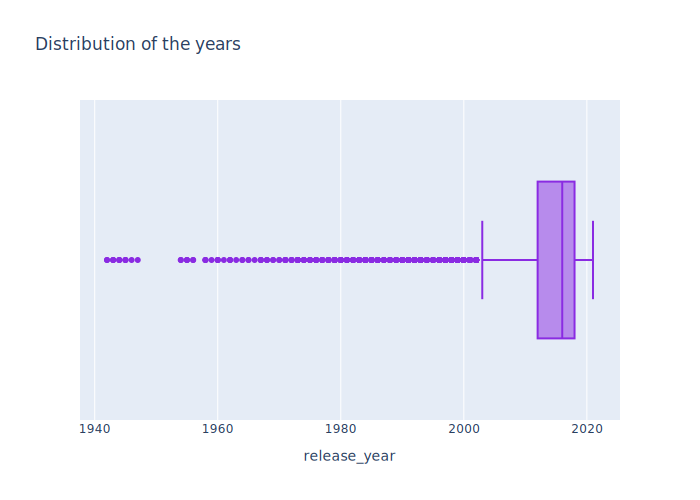

In [11]:
df = movies
fig = px.box(df, x="release_year",color_discrete_sequence=["blueviolet"],title="Distribution of the years")
fig.show("svg")

## The oldest movie is from 1942 and the newest from 2021, most of the movies are distributed between 2012 and 2018, the average being 2016.

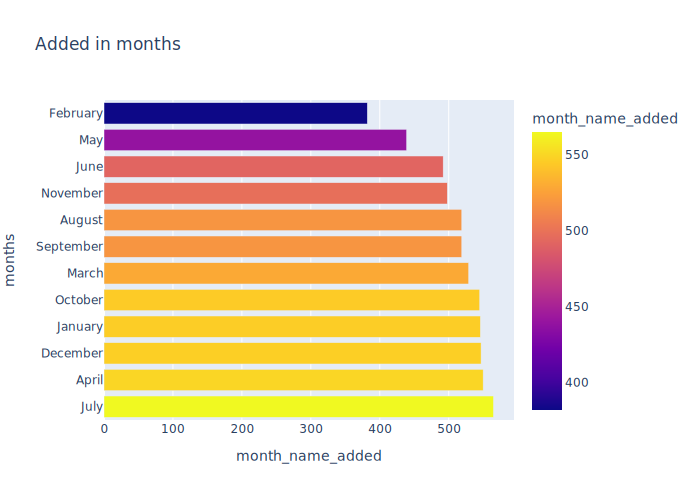

In [12]:
month=movies["month_name_added"].value_counts()
fig = px.bar(month, x="month_name_added",color="month_name_added",title="Added in months",labels={"index":"months","duration_min":"counts"})
fig.show("svg")

## Most of the movies were added between July and they almost never add movies in February digging into data netflix prefers to upload their movies on holidays and weekends and that is when people have time to watch them and thus give them a great rating .February may be the one in which fewer movies are added because it has fewer days.

In [ ]:
df1=pd.DataFrame(movies["duration_min"].dropna().value_counts().reset_index())
fig = px.histogram(df1, x="index",y="duration_min",color="duration_min",color_discrete_sequence=["darkblue"],labels={"sum of duration_min":"count","index":"Duration"},title="Duration")
fig.show("svg")

## Most of the movies last between 90 and 100 min, which is equivalent to around 1 hour 30 minutes. It is rare that there are movies that last more than 200 minutes. This will happen because the movies have found in 1:30 enough time to tell the plot and without letting the viewer get bored. Most people go to the movies for distraction and in a way they want to see concise stories but not so long, although there are cases in which the movies take around 2 hours and they are good, the normal thing is that they do not exceed 1 with 40 minutes.

In [ ]:
df =pd.DataFrame(movies["duration_min"].dropna().value_counts().reset_index())
fig = px.violin(df, y="duration_min", box=True, # draw box plot inside the violin
                points='all', # can be 'outliers', or False
                labels={"index":"Duration"},
                title="Graphs of duration values in which netflix movies are distributed"
                
               )
fig.show("svg")

## In the count of the duration by movies we can notice that the maximum number of times that the duration is repeated is 152, that is, 152 movies have the same duration, although on average the movies share the same duration is 13, which It means that there are many movies that have different durations, most movies share the range of 13 to 39 times the same duration.
## This tells us that most of the movies have a different duration time among themselves and that most of the studios or producers have an estimate of time which is the one that repeats in the duration of the movies that netflix adds .

In [ ]:
df=movies_country.value_counts().reset_index()
fig = px.pie(df, values=0 , names='index', title='Population country',labels={"index":"country","0":"counts"})
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=12, uniformtext_mode='hide')
fig.show("svg")

## There are 121 countries that have added movies to netflix. Most of the movies are from the United States, which in addition to being the country of origin of netflix is also the third country that generates the most movies in the world, of which the majority are made in by hollywood. The second country that appears with 12.3% of the movies is India, the country that produces the most movies in the world. The third country that produced the most movies was United Kingdom.

In [ ]:

df=pd.DataFrame(movies_cast.value_counts().reset_index()[1:21])
df=df.rename(columns={"index":"cast", 0:"counts"})
fig = px.funnel(df, x='cast', y='counts',color_discrete_sequence=["chocolate"],title="top 20 actors")
fig.show("png")


## Most of the cast appear only in one or two movies so I only took the 20 actors who have appeared in more movies than doing a separate investigation I could tell that the vast majority of them are from India. It is because India is the foreign country that contributes the most movies.

In [ ]:
df=pd.DataFrame(movies_listed_in.value_counts().reset_index())
df=df.rename(columns={"index":"Categories", 0:"counts"})
fig = px.bar(df, x="Categories", y="counts", color_discrete_sequence=["teal"],title="Movies categories")
fig.show("svg")

## Most of the categories refer to foreign categories since 60% of the films that were added were filmed outside the United States

In [ ]:
df=pd.DataFrame(movies_director.value_counts().reset_index()[1:])
df=df.rename(columns={"index":"Directors", 0:"counts"})
fig = px.box(df, x="counts",title="Number of films directed")
fig.show("svg")

## Most directors have only directed one of the movies added while very few directors have directed more than 15 movies.
## It seems that the same directors direct the vast majority of movies this could be because netflix likes those directors or it is due to the level of competition in the film industry worldwide since netflix publishes movies from all over the world and the same directors are the ones who direct most movies.

In [ ]:
df=pd.DataFrame(movies_director.value_counts().reset_index()[1:11])
df=df.rename(columns={"index":"Directors", 0:"counts"})
fig =px.pie(df, values="counts" , names='Directors', title='10 directors',hole=.35)
fig.show("png")

## A sign that the same directors are the ones who direct could be seen in the top 10 there is not a single dominant director in addition to the fact that the percentages are not so different between that is, that among the directors with the most films they are all equally divided although they are from different countries India, Mexico, United States or United Kingdom

# MULTI-VARIABLE ANALYSIS

In [ ]:
df = movies[["release_year","month_name_added","duration","rating"]]
fig = px.scatter_matrix(df)
fig.show("png")

In [ ]:
#ls *.png

<img src= "matriz.png" width=750px>

## comparing different variables we can realize that there is no clear pattern between the dates and the categories.

In [ ]:
df = movies
fig = px.density_heatmap(df, x="release_year", y="rating", marginal_x="histogram", marginal_y="histogram", text_auto=True)
fig.show("png")

<img src= "matriz1.png" width=750px>

## The category that has added the most movies is TV-MA followed by TV-14 and that most of these were added from 2017 we can see that in the year 2020-2021 neither UR movies nor NR movies have been added the latest movies NR were added in 2016-2017. Taking into account that Netflix has a TV-Ma rating as an adult category, we can see that most of the movies added to the catalog in the last year are in that category, it could be because that is the public that consumes netflix the most in addition to the following categories are content for adolescents and the least they add is content for children.

In [ ]:
year_country2 = df.groupby('year_added')['country'].value_counts().reset_index(name='counts')

fig = px.choropleth(year_country2, locations="country", color="counts", 
                    locationmode='country names',
                    animation_frame='year_added',
                    range_color=[0,200],
                    color_continuous_scale=px.colors.sequential.OrRd
                   )

fig.update_layout(title='Comparison by country')
fig.show("svg")

## The evolution of how the movies were added is captured on a map.

# Rating added by years

In [ ]:
#children
column="year_added"
kids = movies[movies["rating"]=="TV-Y7"]
kids = kids[column].value_counts().reset_index()
kids = kids.rename(columns = {column : "count", "index" : column})
kids = kids.sort_values(column)
t1 = go.Scatter(x=kids[column], y=kids["count"], name="Kids", marker=dict(color="#EB2B11"))
data = [ t1]
layout = go.Layout(title="Kids movies added from 2015-2021", legend=dict(x=0.3, y=1.2, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show("svg")

## Children's movies have had an increase in the aggregation of movies every year except for 2018 in which it had a decline of 25% which was increased in the following year in addition to creating a new record of movies added until that year. It continued with the same number of movies added until the year 2021 where it added more movies than the movies that had been added in the previous two years together.

In [ ]:
column="year_added"
tv14 = movies[movies["rating"]=="TV-14"]
pg13 = movies[movies["rating"]=="PG-13"]

tv14 = tv14[column].value_counts().reset_index()
tv14 = tv14.rename(columns = {column : "count", "index" : column})
tv14 = tv14.sort_values(column)

pg13 = pg13[column].value_counts().reset_index()
pg13 = pg13.rename(columns = {column : "count", "index" : column})
pg13 = pg13.sort_values(column)

t1 = go.Scatter(x=tv14[column], y=tv14["count"], name="TV-14", marker=dict(color="#EB2B11"))
t2 = go.Scatter(x=pg13[column], y=pg13["count"], name="PG-13", marker=dict(color="#291D1B"))

data = [t1,t2]
layout = go.Layout(title="Teens movies added from 2011-2021", legend=dict(x=0.6, y=1.2, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show("png")

## In movies for young people are TV-14 and PG-13 TV-14 movies were added since 2011 while PG-13 movies were added from 2015 have added much less PG-13 movies than TV-14 movies. In the year 2018 alone, more TV-14 movies were added than all the PG-14 movies up to that year.Although we can note that since 2018 the TV-14 movies that have been added have decreased

In [ ]:
column="year_added"

ur = movies[movies["rating"]=="UR"]
nr = movies[movies["rating"]=="NR"]
nc17 = movies[movies["rating"]=="NC-17"]
r = movies[movies["rating"]=="R"]
tvma = movies[movies["rating"]=="TV-MA"]

ur=ur[column].value_counts().reset_index()
ur= ur.rename(columns = {column : "count", "index" : column})
ur=ur.sort_values(column)

nr = nr[column].value_counts().reset_index()
nr = nr.rename(columns = {column : "count", "index" : column})
nr = nr.sort_values(column)

nc17 = nc17[column].value_counts().reset_index()
nc17 = nc17.rename(columns = {column : "count", "index" : column})
nc17 = nc17.sort_values(column)

r = r[column].value_counts().reset_index()
r = r.rename(columns = {column : "count", "index" : column})
r = r.sort_values(column)

tvma = tvma[column].value_counts().reset_index()
tvma = tvma.rename(columns = {column : "count", "index" : column})
tvma = tvma.sort_values(column)

t1 = go.Scatter(x=ur[column], y=ur["count"], name="UR", marker=dict(color="#E75D0E"))
t2 = go.Scatter(x=nr[column], y=nr["count"], name="NR", marker=dict(color="#D3E70E"))
t3 = go.Scatter(x=nc17[column], y=nc17["count"], name="NC-17", marker=dict(color="#0EE4E7"))
t4 = go.Scatter(x=r[column], y=r["count"], name="R", marker=dict(color="#0E6AE7")) 
t5 = go.Scatter(x=tvma[column], y=tvma["count"], name="TV-MA", marker=dict(color="#E70E77")) 

data = [t1,t2,t3,t4,t5]
layout = go.Layout(title="Adults movies ", legend=dict(x=0.4 , y=1.2, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show("png")

## Most of the movies added are focused on TV-MA. The UR and NR categories stopped being added in 2019 while the TV-MA and R categories are more consistent in the fact that they still add those categories.

In [ ]:
column="year_added"

ur = movies[movies["rating"]=="UR"]
nr = movies[movies["rating"]=="NR"]
nc17 = movies[movies["rating"]=="NC-17"]
r = movies[movies["rating"]=="R"]
tvma = movies[movies["rating"]=="TV-MA"]
tv14 = movies[movies["rating"]=="TV-14"]
pg13 = movies[movies["rating"]=="PG-13"]
kids = movies[movies["rating"]=="TV-Y7"]


ur=ur[column].value_counts().reset_index()
ur= ur.rename(columns = {column : "count", "index" : column})
ur=ur.sort_values(column)

nr = nr[column].value_counts().reset_index()
nr = nr.rename(columns = {column : "count", "index" : column})
nr = nr.sort_values(column)

nc17 = nc17[column].value_counts().reset_index()
nc17 = nc17.rename(columns = {column : "count", "index" : column})
nc17 = nc17.sort_values(column)

r = r[column].value_counts().reset_index()
r = r.rename(columns = {column : "count", "index" : column})
r = r.sort_values(column)

tvma = tvma[column].value_counts().reset_index()
tvma = tvma.rename(columns = {column : "count", "index" : column})
tvma = tvma.sort_values(column)

tv14 = tv14[column].value_counts().reset_index()
tv14 = tv14.rename(columns = {column : "count", "index" : column})
tv14 = tv14.sort_values(column)

pg13 = pg13[column].value_counts().reset_index()
pg13 = pg13.rename(columns = {column : "count", "index" : column})
pg13 = pg13.sort_values(column)


kids = kids[column].value_counts().reset_index()
kids = kids.rename(columns = {column : "count", "index" : column})
kids = kids.sort_values(column)


t1 = go.Scatter(x=ur[column], y=ur["count"], name="UR", marker=dict(color="#C7C7C7"))
t2 = go.Scatter(x=nr[column], y=nr["count"], name="NR", marker=dict(color="#C7C7C7"))
t3 = go.Scatter(x=nc17[column], y=nc17["count"], name="NC-17", marker=dict(color="#C7C7C7"))
t4 = go.Scatter(x=r[column], y=r["count"], name="R", marker=dict(color="#C7C7C7")) 
t5 = go.Scatter(x=tvma[column], y=tvma["count"], name="TV-MA", marker=dict(color="#C7C7C7")) 
t6 = go.Scatter(x=tv14[column], y=tv14["count"], name="TV-14", marker=dict(color="#291D1B"))
t7 = go.Scatter(x=pg13[column], y=pg13["count"], name="PG-13", marker=dict(color="#291D1B"))
t8 = go.Scatter(x=kids[column], y=kids["count"], name="Kids", marker=dict(color="#EB2B11"))

data = [t1,t2,t3,t4,t5,t6,t7,t8]
layout = go.Layout(title="movies added ", legend=dict(x=0.3, y=1.2, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show("png")

## We can see that the children's category is the one with the fewest movies and they are very few compared to the movies that are added for teenagers and adults. The most popular categories are TV-14 and TV-MA, one for adults and one for teenagers.

## Conclusions: The most likely thing you will find on netflix is a US movie with an adult rating added between 2018 and 2020, starring Samuel L. Jackson or Adam Sandler. With an average duration of an hour and a half.